<a href="https://colab.research.google.com/github/Anuj-1996/Correlation_Indian_Equities/blob/main/Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Enter date start date in: yy-mm-dd
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


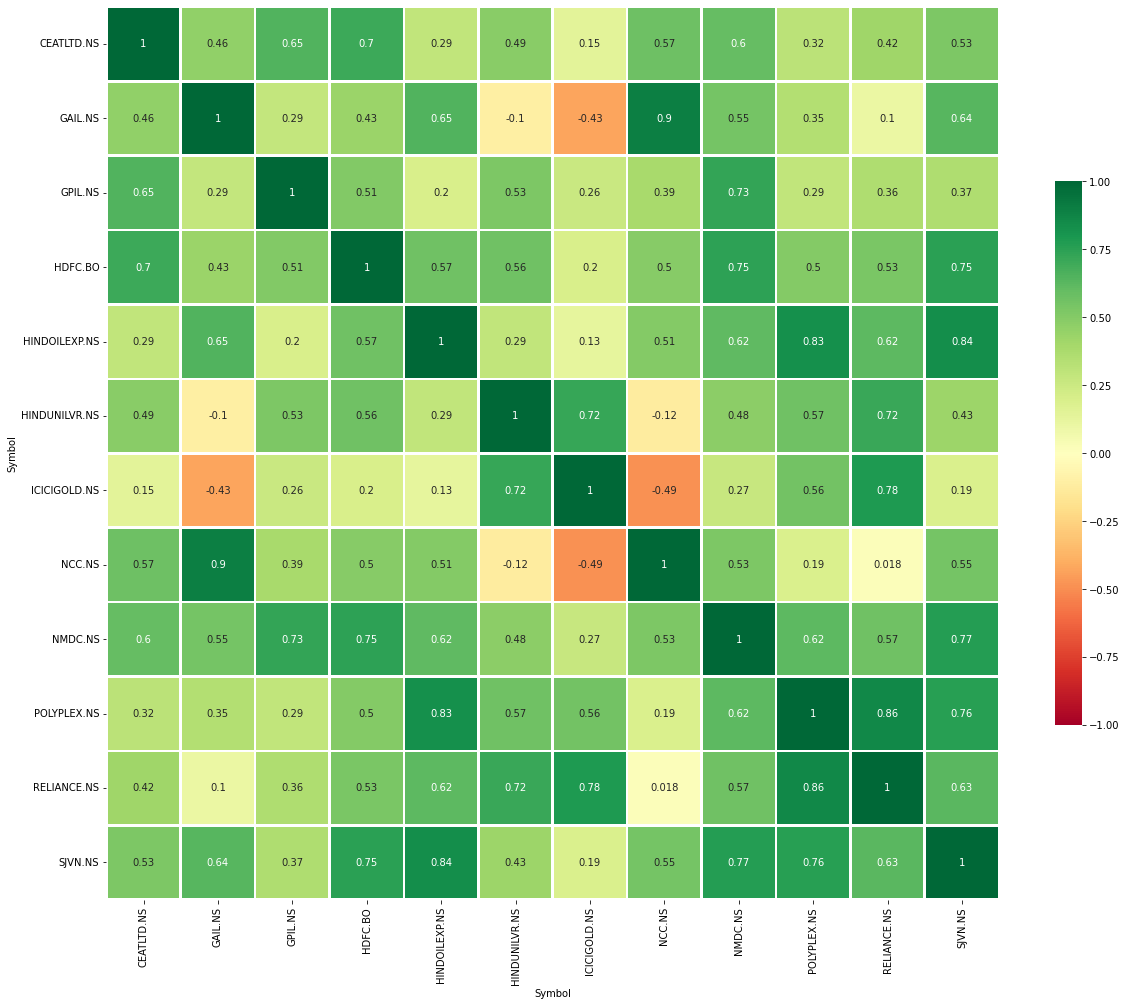

In [ ]:
import numpy as np
import pandas as pd
 #used to grab the stock prices, with yahoo
import pandas_datareader as web
from datetime import datetime
 #to visualize the results
import matplotlib.pyplot as plt
import seaborn
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
#select start date for correlation window as well as list of tickers

print('Enter date start date in: yy-mm-dd')
start= '2019-01-01'
today= datetime.today().strftime('%Y-%m-%d')
symbols_list = ['NMDC.NS','RELIANCE.NS','HDFC.BO', 'HINDUNILVR.NS','GPIL.NS', 'GAIL.NS','HINDOILEXP.NS', 'NCC.NS', 'SJVN.NS', 'POLYPLEX.NS', 'CEATLTD.NS', 'ICICIGOLD.NS']
#array to store prices
symbols=[]

#pull price using iex for each symbol in list defined above
for ticker in symbols_list: 
    r = pdr.get_data_yahoo(ticker, data_source='yahoo', start= start, end= today)
    # add a symbol column
    r['Symbol'] = ticker 
    symbols.append(r)

# concatenate into df
df = pd.concat(symbols)
df = df.reset_index()
df = df[['Date', 'Close', 'Symbol']]
df_pivot = df.pivot('Date','Symbol','Close').reset_index()


df_pivot.head()
dp = pd.DataFrame(df_pivot)
corrM=dp.corr()

import matplotlib.pyplot as plt
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(20, 20)

#take the bottom triangle since it repeats itself
mask = np.zeros_like(corrM)
mask[np.triu_indices_from(mask)] = 0
 #generate plot
seaborn.heatmap(corrM, cmap='RdYlGn', vmax=1.0, vmin=-1.0 , mask = mask,center=0, square=True, linewidths=1.5, cbar_kws={"shrink": .5}, annot=True)
plt.yticks(rotation=0) 
plt.xticks(rotation=90)
plt.show()



Stocks which are least correlated or <0.1 (Including negative correlated stocks)

In [ ]:
matrix = df_pivot.corr()
corr_pairs = matrix.unstack()
#matrix = matrix[matrix < 0.2]
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
strong_pairs = sorted_pairs[(sorted_pairs) <= 0.1 ]


with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(strong_pairs)


Symbol         Symbol       
ICICIGOLD.NS   NCC.NS          -0.487647
NCC.NS         ICICIGOLD.NS    -0.487647
GAIL.NS        ICICIGOLD.NS    -0.425319
ICICIGOLD.NS   GAIL.NS         -0.425319
NCC.NS         HINDUNILVR.NS   -0.120905
HINDUNILVR.NS  NCC.NS          -0.120905
GAIL.NS        HINDUNILVR.NS   -0.104892
HINDUNILVR.NS  GAIL.NS         -0.104892
RELIANCE.NS    NCC.NS           0.018396
NCC.NS         RELIANCE.NS      0.018396
dtype: float64
